In [26]:
import pandas as pd
import numpy as np

In [27]:
housing = pd.read_csv("/Users/tazawanaoki/diveintocode-ml/house-prices-advanced-regression-techniques/train.csv")

 ## 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [28]:
X = housing[["GrLivArea", "YearBuilt"]]
X.head()

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000


In [29]:
y = housing["SalePrice"]
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

 ## 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression().fit(X_train, y_train)
y_pred =reg.predict(X_test)
print(reg.score(X_test, y_test))
print("切片：{}".format(reg.intercept_))
print("回帰係数：{}".format(reg.coef_))

0.5871035359601553
切片：180733.1497716894
回帰係数：[50915.49019418 31435.11963558]


In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

平均絶対誤差 (MAE):31844.32869713221
平均二乗誤差 (MSE):2725908099.0636377
二乗平均平方根誤差 (RMSE):52210.229831553486
決定係数 (R**2) :0.5871035359601553


<IPython.core.display.Javascript object>


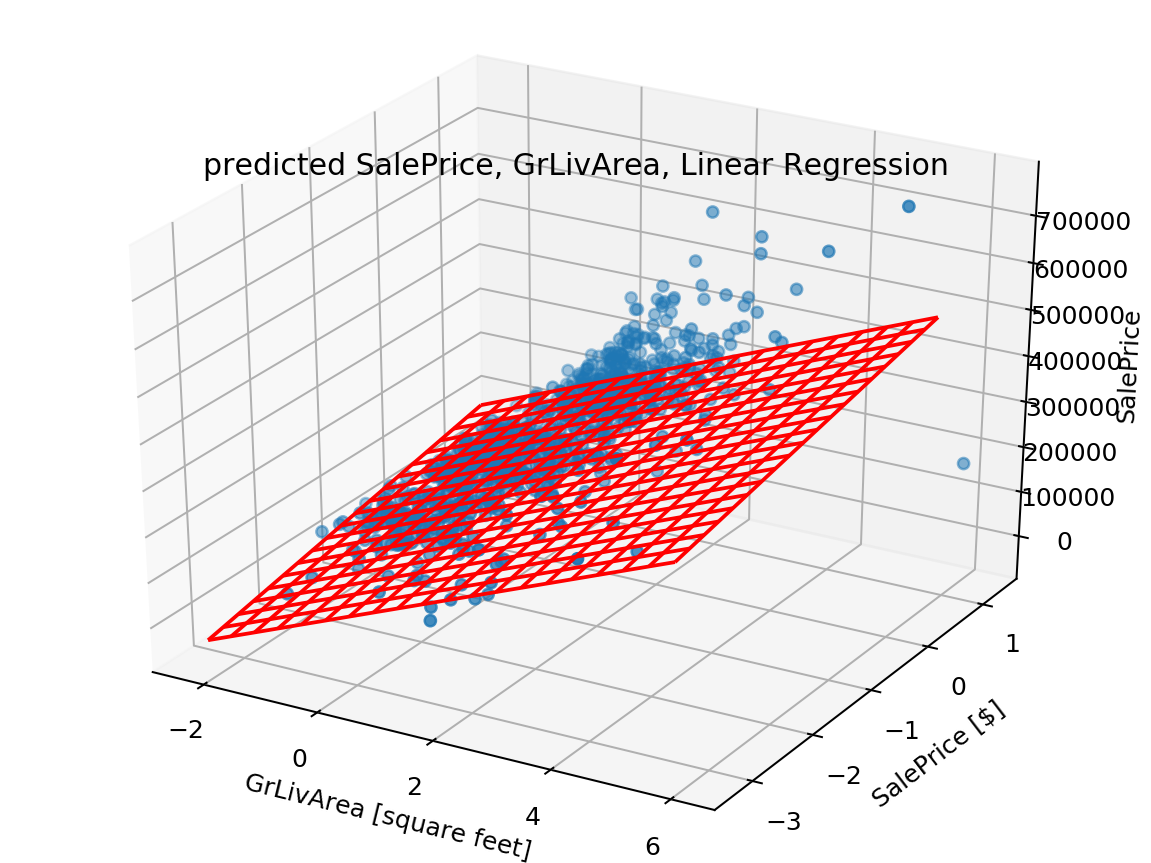

In [33]:
from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

fig=plt.figure()
ax=Axes3D(fig)

x1 = X_train[:,0]
x2 = X_train[:,1]
y = y_train

ax.scatter3D(x1, x2, y)
ax.set_xlabel("GrLivArea")
ax.set_ylabel("YearBuilt")
ax.set_zlabel("SalePrice")

mesh_x1 = np.arange(x1.min(), x1.max(), (x1.max()-x1.min())/20)
mesh_x2 = np.arange(x2.min(), x2.max(), (x2.max()-x2.min())/20)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = reg.coef_[0] * mesh_x1 + reg.coef_[1] * mesh_x2 + reg.intercept_
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y, color="red")
plt.show()


## 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

 - 線形回帰
 - SVM
 - 決定木
 - ランダムフォレスト

In [34]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
X = housing[["GrLivArea", "YearBuilt"]]
y = housing["SalePrice"]
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)


In [45]:
sc = StandardScaler()
X = sc.fit_transform(X)

models = {"LinearRegression": LinearRegression(),
              "SVR": SVR(), 
              "DecisionTreeRegressor": DecisionTreeRegressor(), 
              "RandomForestRegressor": RandomForestRegressor()}


cross_val_score_list = []
mean_absolute_error_list = []
mean_squared_erro_listr = []
sqrt_mean_squared_error_list = []
r2_score_list = []

for i in models.values():
    reg = i.fit(X_train, y_train)
    y_pred =reg.predict(X_test)
    cross_val_score_list.append(cross_val_score(reg, X, y,  cv=5).mean())
    mean_absolute_error_list.append(mean_absolute_error(y_test, y_pred))
    mean_squared_erro_listr.append(mean_squared_error(y_test, y_pred))
    sqrt_mean_squared_error_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_score_list.append(r2_score(y_test, y_pred))
    
pd.DataFrame({
                   "交差検証法(平均)":cross_val_score_list, 
                   "平均絶対誤差 (MAE)":mean_absolute_error_list, 
                   "平均二乗誤差 (MSE)":mean_squared_erro_listr, 
                   "二乗平均平方根誤差 (RMSE)":sqrt_mean_squared_error_list, 
                   "決定係数 (R**2)":r2_score_list },
                  index=models.keys())
    

,交差検証法(平均),平均絶対誤差 (MAE),平均二乗誤差 (MSE),二乗平均平方根誤差 (RMSE),決定係数 (R**2)
LinearRegression,0.647501,31844.328697,2.725908e+09,52210.229832,0.587104
SVR,-0.049108,55234.412738,6.962338e+09,83440.623619,-0.054593
DecisionTreeRegressor,0.552863,36076.299543,2.922907e+09,54063.916886,0.557264
RandomForestRegressor,0.703603,28980.469017,1.824157e+09,42710.148152,0.723693


In [64]:
! pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/c3/8b/af9e0984f5c0df06d3fab0bf396eb09cbf05f8452de4e9502b182f59c33b/matplotlib-3.1.1-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl


In [67]:
import numpy as np
import matplotlib.pyplot as plt
 
# 乱数を生成
x = np.random.rand(100)
y = np.random.rand(100)
 
# 散布図を描画
plt.scatter(x, y)

AttributeError: 'NoneType' object has no attribute 'sqrt'

In [46]:
models = {"LinearRegression": LinearRegression(),
              "SVR": SVR(), 
              "DecisionTreeRegressor": DecisionTreeRegressor(), 
              "RandomForestRegressor": RandomForestRegressor()}
models.keys()

dict_keys(['LinearRegression', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor'])

In [58]:
sns.scatterplot(x="petal_length", y="petal_width",hue="Species",style="Species",data=iris_df_replace)r(x=[1,1,2,2] ,y =  [1,1,2,2])

AttributeError: 'NoneType' object has no attribute 'sqrt'

In [55]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse_list.append(mean_squared_error(y_test, y_pred))
print("MSE : {}".format(mse_list[-1]))

# plt.title("predicted SalePrice, GrLivArea, {}".format(model_name))
# plt.xlabel("GrLivArea [square feet]")
# plt.ylabel("SalePrice [$]")
plt.scatter(X_test["GrLivArea"], y_pred)
plt.show()


MSE : 2725908099.0636377


AttributeError: 'NoneType' object has no attribute 'sqrt'

In [49]:

linear_reg = LinearRegression()
svr = SVR()
tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

models = [linear_reg, svr, tree, random_forest]
model_names = ["Linear Regression", "SVM", "Decision Tree", "Random Forest"]
mse_list = []

for model, model_name in zip(models, model_names):
    print(model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_list.append(mean_squared_error(y_test, y_pred))
    print("MSE : {}".format(mse_list[-1]))

    plt.title("predicted SalePrice, GrLivArea, {}".format(model_name))
    plt.xlabel("GrLivArea [square feet]")
    plt.ylabel("SalePrice [$]")
    plt.scatter(X_test["GrLivArea"], y_pred)
    plt.show()

    plt.title("predicted SalePrice, YearBuilt, {}".format(model_name))
    plt.xlabel("YearBuilt")
    plt.ylabel("SalePrice [$]")
    plt.scatter(X_test["YearBuilt"], y_pred)
    plt.show()

Linear Regression
MSE : 2725908099.0636377


AttributeError: 'NoneType' object has no attribute 'sqrt'

In [21]:
models = {"LinearRegression": LinearRegression(),
              "SVR": SVR(), 
              "DecisionTreeRegressor": DecisionTreeRegressor(), 
              "RandomForestRegressor": RandomForestRegressor()}
mse_list = []


for model, model_name in zip(models.values(), models.keys()):
    print(model_name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_list.append(mean_squared_error(y_test, y_pred))
    print("MSE : {}".format(mse_list[-1]))

    plt.title("predicted SalePrice, GrLivArea, {}".format(model_name))
    plt.xlabel("GrLivArea [square feet]")
    plt.ylabel("SalePrice [$]")
    plt.scatter(X_test[:,0], y_pred)
    plt.show()

    plt.title("predicted SalePrice, YearBuilt, {}".format(model_name))
    plt.xlabel("YearBuilt")
    plt.ylabel("SalePrice [$]")
    plt.scatter(X_test[:,1], y_pred)
    plt.show()

LinearRegression
MSE : 2725908099.0636377


AttributeError: 'NoneType' object has no attribute 'sqrt'

 - 「交差検証法による平均値」「平均絶対誤差」「平均二乗誤差」「二乗平均平方根誤差」「決定係数」のいずれの指標をみても、ランダムフォレストの精度が最も良い

 ## 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

Kaggleのカーネルも参考にできます。

In [44]:
housing = pd.read_csv("/Users/tazawanaoki/diveintocode-ml/house-prices-advanced-regression-techniques/train.csv")

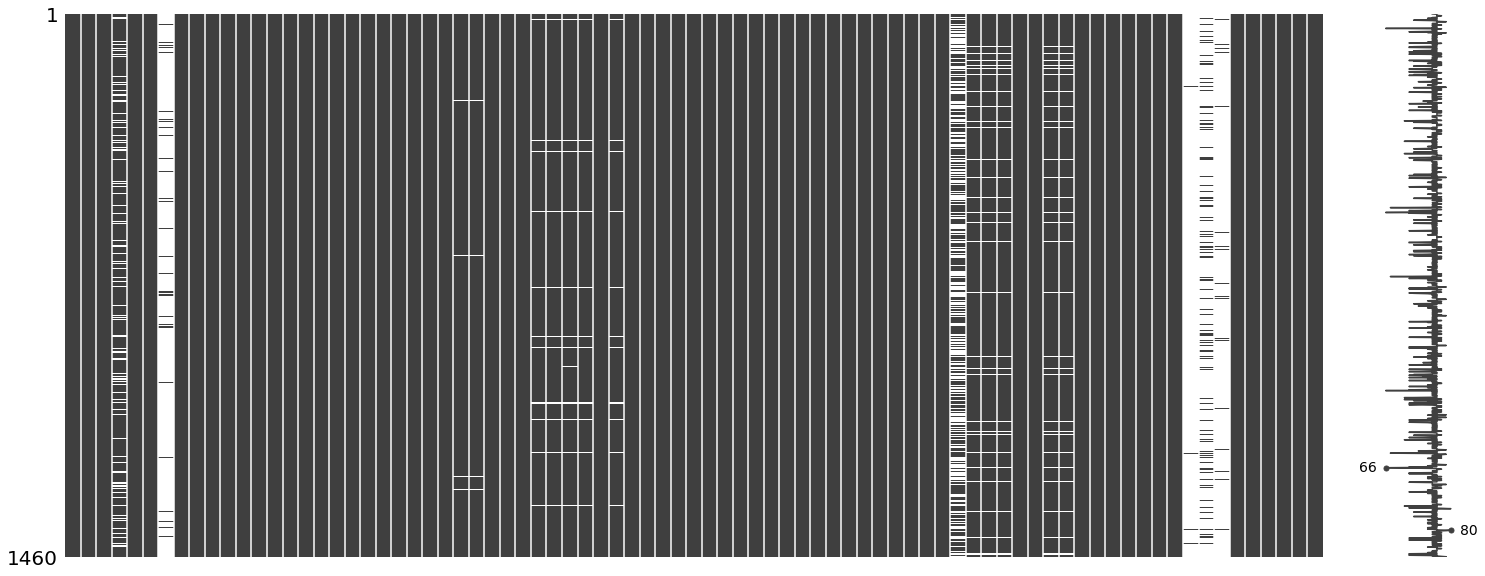

In [45]:
import missingno as msno
%matplotlib inline
msno.matrix(housing)

In [46]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [47]:
list_i = []

for i in housing.columns:
    if housing[i].dtypes =='int64':
        list_i.append(i)

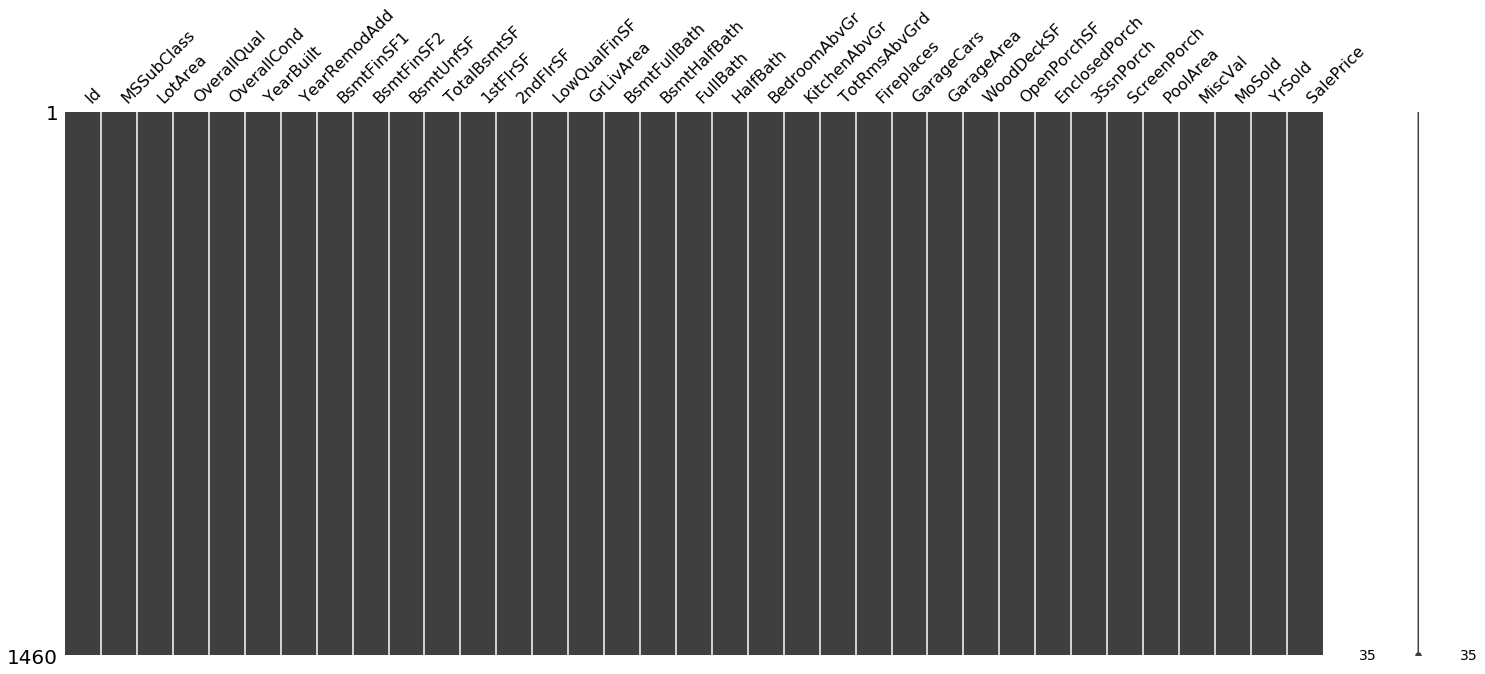

In [48]:
housing_int = housing[list_i]
msno.matrix(housing_int)

In [49]:
list_o = []

for i in housing.columns:
    if housing[i].dtypes == "O":
        list_o.append(i)


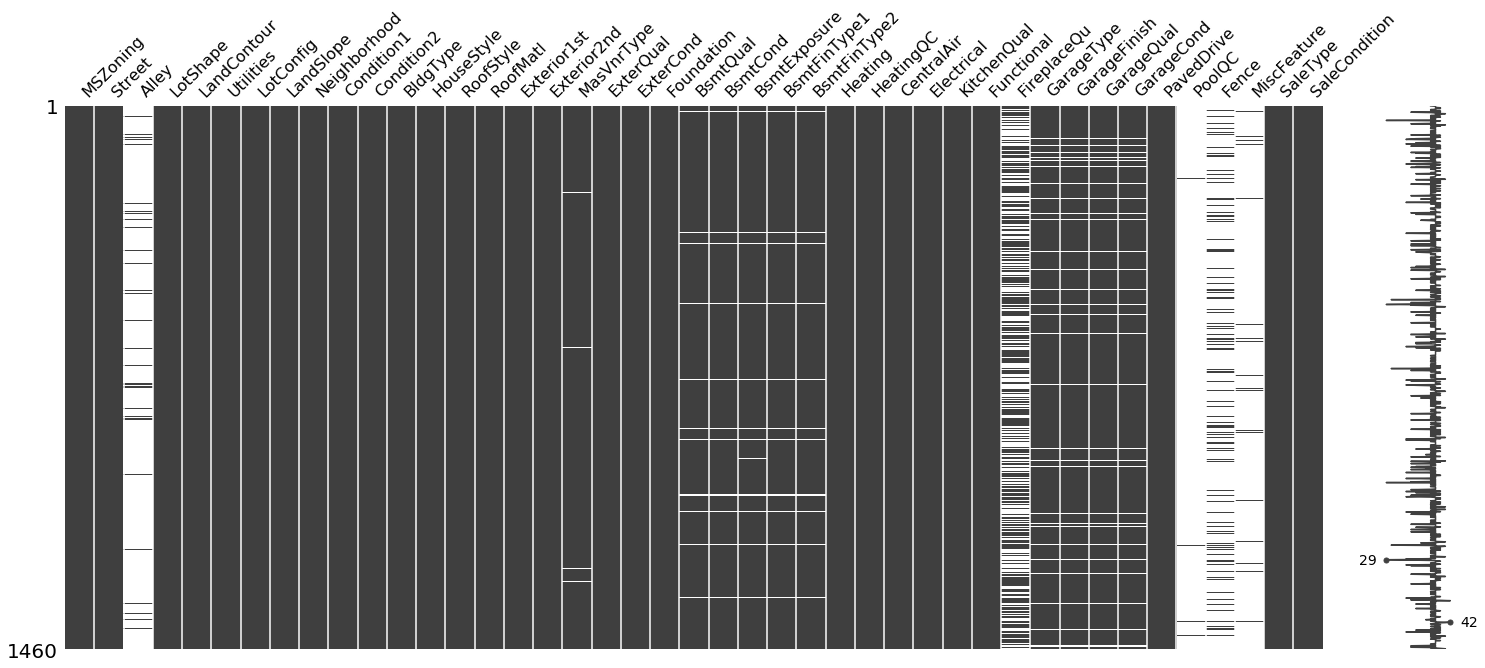

In [50]:
housing_object = housing[list_o]
msno.matrix(housing_object)

In [51]:
housing_o_dummy = pd.get_dummies(housing_object)

In [52]:
housing_o_dummy.shape

(1460, 252)

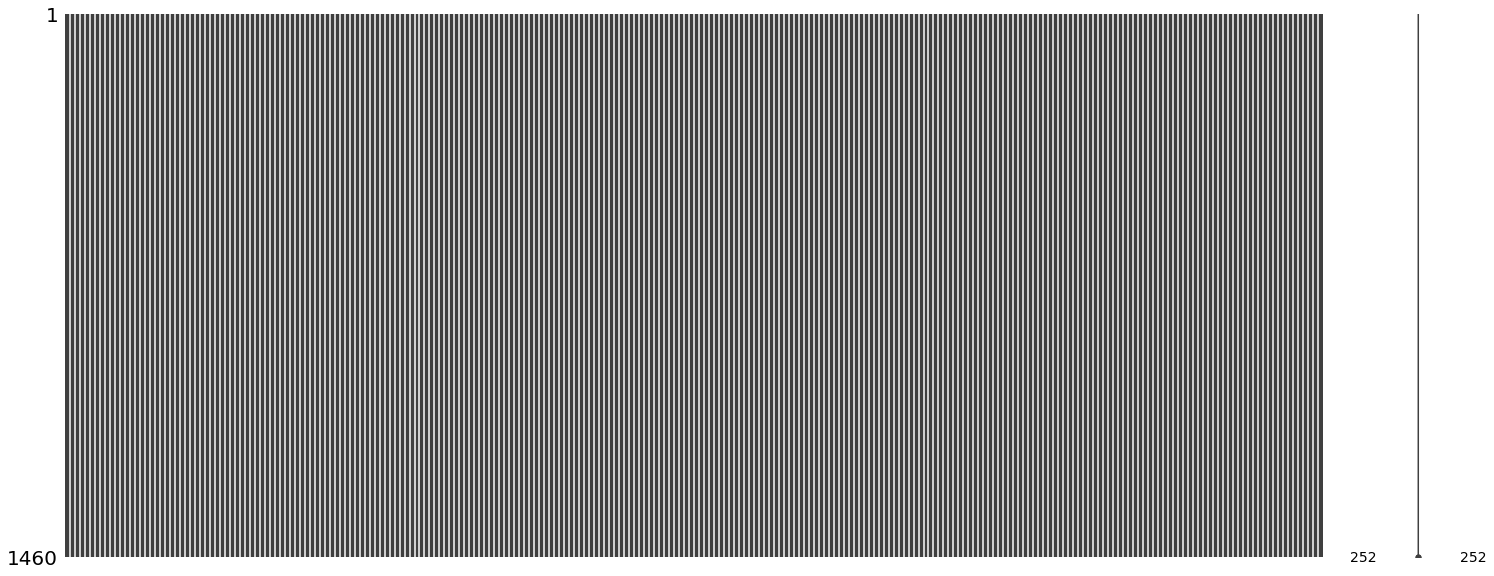

In [53]:
msno.matrix(housing_o_dummy)

In [54]:
housing_mix = pd.concat([housing_int, housing_o_dummy], axis=1)

In [55]:
housing_mix.isna().sum()

Id                       0
MSSubClass               0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
                        ..
GarageCond_TA            0
PavedDrive_N             0
PavedDrive_P             0
PavedDrive_Y             0
PoolQC_Ex                0
PoolQC_Fa                0
P

In [56]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

In [57]:
len(housing_mix)

1460

In [58]:
X = housing_mix.drop(["SalePrice"],axis=1)
y = housing_mix["SalePrice"]

In [59]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)


In [60]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [61]:
reg = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

交差検証法：[0.8591497  0.89019349 0.92594403 0.76475331 0.88228907 0.89453146
 0.87981252 0.89329457 0.76287827 0.85827479]
交差検証法(平均)：0.864474875276974
平均絶対誤差 (MAE):16993.19208219178
平均二乗誤差 (MSE):947997199.7546643
二乗平均平方根誤差 (RMSE):30789.563162777486
決定係数 (R**2) :0.8564057637039079


 ## 応用編

In [62]:
len(reg.feature_importances_)

286

In [63]:
importance = reg.feature_importances_.reshape(286,1)

In [64]:
column = np.array(X.columns).reshape(286,1)

In [65]:
feature = pd.DataFrame(np.hstack([column,importance]), columns=["columns", "inportance"])

In [66]:
feature_sorted = feature.sort_values('inportance', ascending=False).reset_index()
feature_sorted = feature_sorted.drop("index", axis=1)
feature_sorted.head()

,columns,inportance
0,OverallQual,0.57192
1,GrLivArea,0.116786
2,GarageCars,0.0344896
3,TotalBsmtSF,0.0336223
4,BsmtFinSF1,0.0330793


In [67]:
feature_sorted["inportance"] =feature_sorted["inportance"].astype('float64')

In [68]:
list_col = []

for i in range(len(feature_sorted)):
    a = feature_sorted.iloc[i,0]
    b = feature_sorted.iloc[i,1]
    if b >= 0.008:
        list_col.append(a)

In [69]:
list_col

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'BsmtFinSF1',
 '1stFlrSF',
 '2ndFlrSF',
 'GarageArea',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd']

In [70]:
X = X[list_col]

In [71]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)


In [72]:
# from sklearn.neighbors import LocalOutlierFactor

# model = LocalOutlierFactor(n_neighbors=1,
#                            contamination=0.1)
# model.fit(X_train) # train_dataは正常データが大多数であるような訓練データ
# prediction = model.predict(X_train) # テストデータに対する予測
# # score = model.score_samples(test_data) # テストデータの異常度

In [73]:
# from sklearn.neighbors import LocalOutlierFactor ## 外れ値の除外
# local_outlier_factor = LocalOutlierFactor(contamination='auto', n_neighbors=15)
# local_outlier_factor.fit(X_train[1:])
# predicted = local_outlier_factor.predict(X_train[1:])
# print(local_outlier_factor)
# Outlier = np.argwhere(predicted == -1) #外れ値のあるインデックス
# print("外れ値の数:{}".format(len(Outlier)))
# X_train = X_train.drop(index=X_train.index[Outlier])
# y_train = y_train.drop(index=y_train.index[Outlier])

In [74]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [75]:
reg = RandomForestRegressor(n_estimators=100,random_state=0,max_depth=None).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
交差検証法：[0.85162189 0.88108318 0.91999268 0.73946265 0.89821686 0.86854949
 0.87673289 0.88733547 0.84646412 0.85750838]
交差検証法(平均)：0.8626967606418521
平均絶対誤差 (MAE):17643.859187214613
平均二乗誤差 (MSE):908326862.653834
二乗平均平方根誤差 (RMSE):30138.461517699172
決定係数 (R**2) :0.8624146757144882


In [76]:
reg = RandomForestRegressor(n_estimators=1000,random_state=0).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y,  cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
交差検証法：[0.85508955 0.87920148 0.92076151 0.74374947 0.89642276 0.872504
 0.87142523 0.88534842 0.8465384  0.85490977]
交差検証法(平均)：0.8625950593643064
平均絶対誤差 (MAE):17502.82347960861
平均二乗誤差 (MSE):851604906.961395
二乗平均平方根誤差 (RMSE):29182.270421634348
決定係数 (R**2) :0.871006416186912


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
X = housing_mix.drop(["SalePrice"],axis=1)
y = housing_mix["SalePrice"]
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [277]:
# from sklearn.neighbors import LocalOutlierFactor ## 外れ値の除外
# local_outlier_factor = LocalOutlierFactor(contamination='auto', novelty=True, n_neighbors=15)
# local_outlier_factor.fit(X_train[1:])
# predicted = local_outlier_factor.predict(X_train[1:])
# print(local_outlier_factor)
# Outlier = np.argwhere(predicted == -1) #外れ値のあるインデックス
# len(Outlier)
# X_train = X_train.drop(index=X_train.index[Outlier])
# y_train = y_train.drop(index=y_train.index[Outlier])

In [278]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [279]:
reg = GradientBoostingRegressor().fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
交差検証法：[0.89918863 0.89373253 0.93656478 0.79902592 0.90576558 0.89248026
 0.88073125 0.90796834 0.91986592 0.87703075]
交差検証法(平均)：0.8909550559860051
平均絶対誤差 (MAE):16529.494267114784
平均二乗誤差 (MSE):703694827.3268325
二乗平均平方根誤差 (RMSE):26527.24688554831
決定係数 (R**2) :0.8934105276453801


In [280]:
len(reg.feature_importances_)

286

In [281]:
importance = reg.feature_importances_.reshape(len(reg.feature_importances_),1)
column = np.array(X.columns).reshape(len(reg.feature_importances_),1)
feature = pd.DataFrame(np.hstack([column,importance]), columns=["columns", "inportance"])
feature_sorted = feature.sort_values('inportance', ascending=False).reset_index()
feature_sorted = feature_sorted.drop("index", axis=1)
feature_sorted.head()

,columns,inportance
0,GrLivArea,0.1058
1,OverallQual,0.0924488
2,LotArea,0.0596794
3,1stFlrSF,0.0422448
4,YearBuilt,0.0420247


In [282]:
feature_sorted["inportance"] =feature_sorted["inportance"].astype('float64')

In [283]:
list_col = []
for i in range(len(feature_sorted)):
    a = feature_sorted.iloc[i,0]
    b = feature_sorted.iloc[i,1]
    if b >= 0.008:
        list_col.append(a)

In [284]:
list_col

['GrLivArea',
 'OverallQual',
 'LotArea',
 '1stFlrSF',
 'YearBuilt',
 'TotalBsmtSF',
 'BsmtUnfSF',
 'BsmtFinSF1',
 'OverallCond',
 'YearRemodAdd',
 'GarageArea',
 '2ndFlrSF',
 'Neighborhood_Crawfor',
 'Id',
 'Exterior1st_BrkFace',
 'OpenPorchSF',
 'Functional_Typ',
 'WoodDeckSF',
 'SaleCondition_Abnorml',
 'Fireplaces',
 'MSZoning_C (all)',
 'MoSold',
 'BsmtFullBath',
 'MSZoning_FV',
 'BsmtExposure_Gd',
 'PoolArea',
 'GarageCars',
 'SaleType_New',
 'KitchenQual_Ex',
 'BsmtFinType1_GLQ',
 'Condition1_Norm',
 'RoofMatl_WdShngl']

In [285]:
X = X[list_col]

In [286]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [287]:
# X_train = np.array(X_train)
# y_train = np.array(y_train)

In [288]:
for i in X_train.columns:
    if X_train[i].dtype() == "uint8":
        X_train[i].astype("int64")
        print(i)

TypeError: 'numpy.dtype' object is not callable

In [ ]:
X_train["Neighborhood_Crawfor"].astype("int64")

In [ ]:
X_train["Neighborhood_Crawfor"].values

In [ ]:
# from sklearn.neighbors import LocalOutlierFactor ## 外れ値の除外
# local_outlier_factor = LocalOutlierFactor(contamination='auto', n_neighbors=15)
# local_outlier_factor.fit(X_train.iloc[:,1:])
# predicted = local_outlier_factor.predict(X_train.iloc[:,1:])
# print(local_outlier_factor)
# Outlier = np.argwhere(predicted == -1) #外れ値のあるインデックス
# print("外れ値の数:{}".format(len(Outlier)))
# X_train = X_train.drop(index=X_train.index[Outlier])
# y_train = y_train.drop(index=y_train.index[Outlier])

In [ ]:
pd.DataFrame(y_train).info

In [ ]:
local_outlier_factor

In [ ]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [289]:
reg = GradientBoostingRegressor(n_estimators=100,random_state=0,max_depth=3).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)
交差検証法：[0.90121487 0.90693048 0.92714347 0.78200815 0.91116262 0.8861651
 0.87619173 0.91359443 0.91858541 0.88342552]
交差検証法(平均)：0.8906421785994313
平均絶対誤差 (MAE):16656.387264670986
平均二乗誤差 (MSE):681571262.9251661
二乗平均平方根誤差 (RMSE):26106.919828374357
決定係数 (R**2) :0.8967616096266632


In [290]:
reg = GradientBoostingRegressor(n_estimators=1000,random_state=0,max_depth=3).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)
交差検証法：[0.89875262 0.901464   0.93102529 0.77777802 0.91901271 0.88630046
 0.88677923 0.92203166 0.92532229 0.88744861]
交差検証法(平均)：0.8935914902265946
平均絶対誤差 (MAE):15783.72988434456
平均二乗誤差 (MSE):622330354.8127524
二乗平均平方根誤差 (RMSE):24946.549958115498
決定係数 (R**2) :0.905734898746178


In [269]:
! pip install xgboost

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [292]:
import xgboost as xgb
# モデルのインスタンス作成

In [293]:
X = housing_mix.drop(["SalePrice"],axis=1)
y = housing_mix["SalePrice"]
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)


In [294]:
# from sklearn.neighbors import LocalOutlierFactor ## 外れ値の除外
# local_outlier_factor = LocalOutlierFactor(contamination='auto', novelty=True, n_neighbors=15)
# local_outlier_factor.fit(X_train[1:])
# predicted = local_outlier_factor.predict(X_train[1:])
# print(local_outlier_factor)
# Outlier = np.argwhere(predicted == -1) #外れ値のあるインデックス
# print("外れ値の数:{}".format(len(Outlier)))
# X_train = X_train.drop(index=X_train.index[Outlier])
# y_train = y_train.drop(index=y_train.index[Outlier])

In [295]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [296]:
import xgboost as xgb
reg = xgb.XGBRegressor().fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
[17:12:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
交差検証法：[0.89694872 0.9067913  0.92857679 0.78226313 0.89653857 0.8864645
 0.84864118 0.91873987 0.88838145 0.86695808]
[17:12:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:12:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:13:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:13:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:13:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
交差検証法(平均)：0.8820303578823655
平均絶対誤差 (MAE):16069.801391267123
平均二乗誤差 (MSE):692241248.4523152
二乗平均平方根誤差 (RMSE):26310.477921396927
決定係数 (R**2) :0.8951454145329879


In [297]:
importance = reg.feature_importances_.reshape(286,1)
column = np.array(X.columns).reshape(286,1)
feature = pd.DataFrame(np.hstack([column,importance]), columns=["columns", "inportance"])
feature_sorted = feature.sort_values('inportance', ascending=False).reset_index()
feature_sorted = feature_sorted.drop("index", axis=1)
feature_sorted.head()

,columns,inportance
0,OverallQual,0.283047
1,GarageCars,0.107709
2,BsmtQual_Ex,0.067105
3,GrLivArea,0.0416543
4,GarageType_Attchd,0.0387394


In [298]:
feature_sorted["inportance"] =feature_sorted["inportance"].astype('float64')

In [299]:
list_col = []
for i in range(len(feature_sorted)):
    a = feature_sorted.iloc[i,0]
    b = feature_sorted.iloc[i,1]
    if b >= 0.008:
        list_col.append(a)

In [300]:
X = X[list_col]

In [301]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [302]:
from sklearn.neighbors import LocalOutlierFactor ## 外れ値の除外
local_outlier_factor = LocalOutlierFactor(contamination='auto', novelty=True, n_neighbors=15)
local_outlier_factor.fit(X_train[1:])
predicted = local_outlier_factor.predict(X_train[1:])
print(local_outlier_factor)
Outlier = np.argwhere(predicted == -1) #外れ値のあるインデックス
print("外れ値の数:{}".format(len(Outlier)))
X_train = X_train.drop(index=X_train.index[Outlier])
y_train = y_train.drop(index=y_train.index[Outlier])

TypeError: __init__() got an unexpected keyword argument 'novelty'

In [ ]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
reg = xgb.XGBRegressor(n_estimators=100, max_depth=3).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000, max_depth=3).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

In [1]:
X = housing_mix.drop(["SalePrice"],axis=1)
y = housing_mix["SalePrice"]
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)


NameError: name 'housing_mix' is not defined

In [ ]:
# from sklearn.neighbors import LocalOutlierFactor ## 外れ値の除外
# local_outlier_factor = LocalOutlierFactor(contamination='auto', novelty=True, n_neighbors=15)
# local_outlier_factor.fit(X_train[1:])
# predicted = local_outlier_factor.predict(X_train[1:])
# print(local_outlier_factor)
# Outlier = np.argwhere(predicted == -1) #外れ値のあるインデックス
# print("外れ値の数:{}".format(len(Outlier)))
# X_train = X_train.drop(index=X_train.index[Outlier])
# y_train = y_train.drop(index=y_train.index[Outlier])

In [ ]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [26]:
import lightgbm as lgb

/Users/tazawanaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [27]:
reg = lgb.LGBMRegressor().fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
交差検証法：[0.7445083  0.73544258 0.72237502 0.6939282  0.72411038 0.78290513
 0.70158106 0.78306838 0.57406944 0.76032856]
交差検証法(平均)：0.7222317056548286
平均絶対誤差 (MAE):27940.85291265032
平均二乗誤差 (MSE):1933485258.6725137
二乗平均平方根誤差 (RMSE):43971.41410817389
決定係数 (R**2) :0.7071327434504211


In [ ]:
importance = reg.feature_importances_.reshape(len(reg.feature_importances_),1)
column = np.array(X.columns).reshape(len(reg.feature_importances_),1)
feature = pd.DataFrame(np.hstack([column,importance]), columns=["columns", "inportance"])
feature_sorted = feature.sort_values('inportance', ascending=False).reset_index()
feature_sorted = feature_sorted.drop("index", axis=1)
feature_sorted.head()

In [ ]:
feature_sorted["inportance"] =feature_sorted["inportance"].astype('float64')

In [ ]:
list_col = []
for i in range(len(feature_sorted)):
    a = feature_sorted.iloc[i,0]
    b = feature_sorted.iloc[i,1]
    if b >= 0.008:
        list_col.append(a)

In [ ]:
X = X[list_col]

In [ ]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.25, random_state=0,
)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor ## 外れ値の除外
local_outlier_factor = LocalOutlierFactor(contamination='auto', novelty=True, n_neighbors=15)
local_outlier_factor.fit(X_train[1:])
predicted = local_outlier_factor.predict(X_train[1:])
print(local_outlier_factor)
Outlier = np.argwhere(predicted == -1) #外れ値のあるインデックス
print("外れ値の数:{}".format(len(Outlier)))
X_train = X_train.drop(index=X_train.index[Outlier])
y_train = y_train.drop(index=y_train.index[Outlier])

In [ ]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
reg = lgb.LGBMRegressor(n_estimators=100, max_depth=5).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))

In [ ]:
reg = lgb.LGBMRegressor(n_estimators=1000, max_depth=3).fit(X_train, y_train)
y_pred =reg.predict(X_test)
# print(reg.score(X_test, y_test))
# print("切片：{}".format(reg.intercept_))
# print("回帰係数：{}".format(reg.coef_))
print(reg)
print("交差検証法：{}".format(cross_val_score(reg, X, y, cv=kfold)))
print("交差検証法(平均)：{}".format(cross_val_score(reg, X, y, cv=kfold).mean()))
print("平均絶対誤差 (MAE):{}".format(mean_absolute_error(y_test, y_pred)))
print("平均二乗誤差 (MSE):{}".format(mean_squared_error(y_test, y_pred)))
print("二乗平均平方根誤差 (RMSE):{}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print("決定係数 (R**2) :{}".format(r2_score(y_test, y_pred)))